In [35]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import explained_variance_score, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier as dtc
from sklearn.metrics import classification_report

In [36]:
# reading a csv file

df_main = pd.read_csv('/kaggle/input/ip-network-traffic-flows-labeled-with-87-apps/Dataset-Unicauca-Version2-87Atts.csv')

In [37]:
single_unique_cols = [col for col in df_main.columns if df_main[col].nunique() == 1]
df_main.drop(single_unique_cols, axis = 1, inplace = True)

df_main.drop(['Timestamp', 'Flow.ID'], axis = 1, inplace = True)

In [38]:
df_main.columns

Index(['Source.IP', 'Source.Port', 'Destination.IP', 'Destination.Port',
       'Protocol', 'Flow.Duration', 'Total.Fwd.Packets',
       'Total.Backward.Packets', 'Total.Length.of.Fwd.Packets',
       'Total.Length.of.Bwd.Packets', 'Fwd.Packet.Length.Max',
       'Fwd.Packet.Length.Min', 'Fwd.Packet.Length.Mean',
       'Fwd.Packet.Length.Std', 'Bwd.Packet.Length.Max',
       'Bwd.Packet.Length.Min', 'Bwd.Packet.Length.Mean',
       'Bwd.Packet.Length.Std', 'Flow.Bytes.s', 'Flow.Packets.s',
       'Flow.IAT.Mean', 'Flow.IAT.Std', 'Flow.IAT.Max', 'Flow.IAT.Min',
       'Fwd.IAT.Total', 'Fwd.IAT.Mean', 'Fwd.IAT.Std', 'Fwd.IAT.Max',
       'Fwd.IAT.Min', 'Bwd.IAT.Total', 'Bwd.IAT.Mean', 'Bwd.IAT.Std',
       'Bwd.IAT.Max', 'Bwd.IAT.Min', 'Fwd.PSH.Flags', 'Fwd.Header.Length',
       'Bwd.Header.Length', 'Fwd.Packets.s', 'Bwd.Packets.s',
       'Min.Packet.Length', 'Max.Packet.Length', 'Packet.Length.Mean',
       'Packet.Length.Std', 'Packet.Length.Variance', 'FIN.Flag.Count',
       'SYN.

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:8

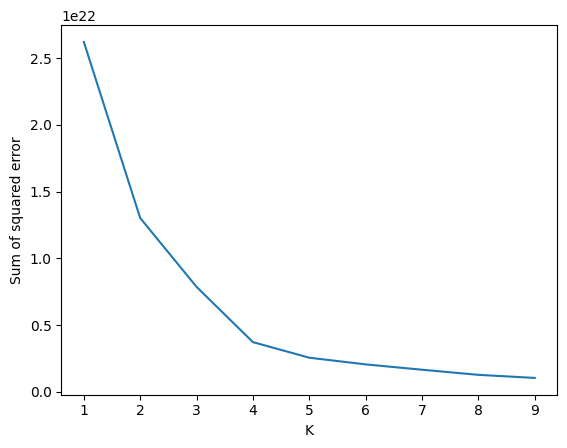

In [39]:
sse = []
k_rng = range(1,10)

for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df_main[['Flow.Duration', 'Total.Fwd.Packets', 'Total.Backward.Packets',
       'Total.Length.of.Fwd.Packets', 'Total.Length.of.Bwd.Packets',
       'Fwd.Packet.Length.Mean', 'Bwd.Packet.Length.Mean', 'Flow.Bytes.s',
       'Flow.Packets.s', 'Down.Up.Ratio', 'Active.Mean']])
    sse.append(km.inertia_)
    
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)

In [40]:
km = KMeans(n_clusters=2)

df_main['Label'] = km.fit_predict(df_main[['Flow.Duration', 'Total.Fwd.Packets', 'Total.Backward.Packets',
       'Total.Length.of.Fwd.Packets', 'Total.Length.of.Bwd.Packets',
       'Fwd.Packet.Length.Mean', 'Bwd.Packet.Length.Mean', 'Flow.Bytes.s',
       'Flow.Packets.s', 'Down.Up.Ratio', 'Active.Mean']])

df_main['Label'].head()

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


0    0
1    0
2    0
3    0
4    0
Name: Label, dtype: int32

In [41]:
df_main['Label'].value_counts()

Label
0    3573427
1       3869
Name: count, dtype: int64

In [42]:
df_main0 = df_main[df_main.Label == 0]
df_main1 = df_main[df_main.Label == 1]

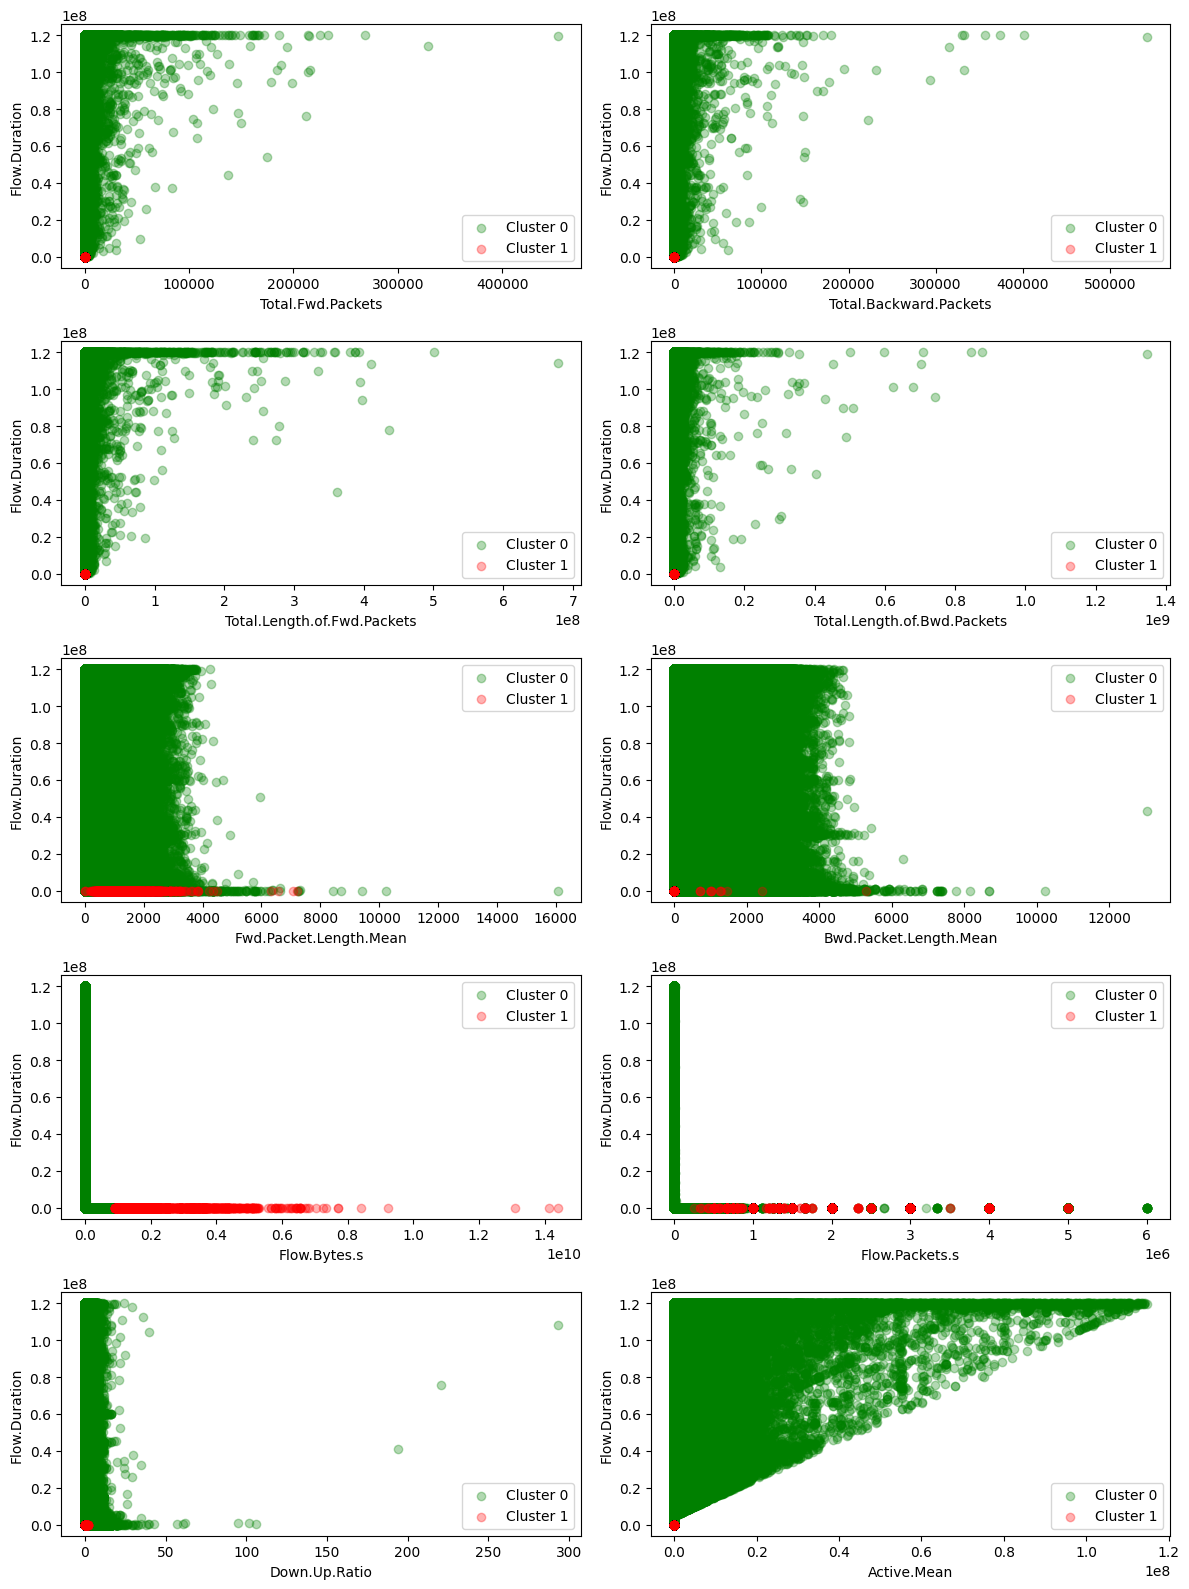

In [43]:
plot_columns = ['Total.Fwd.Packets', 'Total.Backward.Packets', 'Total.Length.of.Fwd.Packets', 'Total.Length.of.Bwd.Packets', 'Fwd.Packet.Length.Mean', 'Bwd.Packet.Length.Mean', 'Flow.Bytes.s', 'Flow.Packets.s', 'Down.Up.Ratio', 'Active.Mean']

# Define the number of rows and columns for subplots
num_rows = 5
num_cols = 2

# Create a single big plot with subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 16))

# Iterate through the columns and create subplots
for i, column in enumerate(plot_columns):
    row = i // num_cols
    col = i % num_cols
    ax = axes[row, col]

    ax.scatter(df_main0[column], df_main0['Flow.Duration'], color='green', label='Cluster 0', alpha=0.3)
    ax.scatter(df_main1[column], df_main1['Flow.Duration'], color='red', label='Cluster 1', alpha=0.3)
    
    ax.set_xlabel(column)
    ax.set_ylabel('Flow.Duration')
    ax.legend()

# Adjust the layout and spacing
plt.tight_layout()
plt.show()


In [44]:
df_main = df_main[['Total.Fwd.Packets', 'Total.Backward.Packets', 'Total.Length.of.Fwd.Packets', 'Total.Length.of.Bwd.Packets', 'Fwd.Packet.Length.Mean', 'Bwd.Packet.Length.Mean', 'Flow.Bytes.s', 'Flow.Packets.s', 'Down.Up.Ratio', 'Active.Mean', 'Label']]
df_main.columns

Index(['Total.Fwd.Packets', 'Total.Backward.Packets',
       'Total.Length.of.Fwd.Packets', 'Total.Length.of.Bwd.Packets',
       'Fwd.Packet.Length.Mean', 'Bwd.Packet.Length.Mean', 'Flow.Bytes.s',
       'Flow.Packets.s', 'Down.Up.Ratio', 'Active.Mean', 'Label'],
      dtype='object')

In [45]:
# import ipaddress

# # Define a function to convert IP addresses to integers
# def ip_to_integer(ip):
#     try:
#         ip_obj = ipaddress.IPv4Address(ip)
#         return int(ip_obj)
#     except ipaddress.AddressValueError:
#         # Handle invalid IP addresses as needed
#         return None
    
# df_main['Destination.IP'] = df_main['Destination.IP'].apply(ip_to_integer)
# df_main['Source.IP'] = df_main['Source.IP'].apply(ip_to_integer)

In [46]:
x = df_main.drop(columns = ['Label'])
y = df_main['Label']

ncategories = len(y.unique())
print(ncategories)

2


In [47]:
y.shape

(3577296,)

In [48]:
# Implement decision tree classifier

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

clf = dtc(max_depth = 20)
clf.fit(x_train, y_train)

# calculate the train and test accuracy

y_train_pred = clf.predict(x_train)
y_test_pred = clf.predict(x_test)

print('Train accuracy: ', accuracy_score(y_train, y_train_pred))
print('Test accuracy: ', accuracy_score(y_test, y_test_pred))

Train accuracy:  1.0
Test accuracy:  1.0


In [49]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    714693
           1       1.00      1.00      1.00       767

    accuracy                           1.00    715460
   macro avg       1.00      1.00      1.00    715460
weighted avg       1.00      1.00      1.00    715460

